# PC lab: Convolutional Neural Networks 
----

<img src="https://raw.githubusercontent.com/flacout/deep-dream-demo/master/image/deep-dream.jpg" style="width:100%">

## Introduction

Convolutional neural networks caused a major step forward in the performance of image recognition. These networks are mostly identical to standard neural networks, in which features are first learned through multiple (layers of) convolutions. Obtained features are subsequently used as the input for a standard neural network, often performing a classification problem.

### Convolution

A convolution is the iteration of a kernel with size $ M \times N $ over a given input $ \textbf{X} $, performing a 2D linear combination of the weights $ W $  of the kernel with the overlapping area of the input. For a normal convolution with single striding and no padding, the output $ y_{ij} $ is equal to:

$$ y_{ij} = \sum_{a=0}^{m-1} \sum_{b=0}^{n-1} W_{ab} x_{(i+a)(j+b)} $$

During a convolution, the kernels slides over the input image to obtain a new image of outputs. The stride of a kernel defines the horizontal and vertical stepsize during iteration. Input data can be padded with multiple layers of a zero-filled border, increasing the output dimensions.

It is important to understand that a convolution applies the same operation at every local patch in the input. In this sense, convolutions are useful when you expect the input data to contain regularly appearing **local patterns**.


**convolution step with M,N = 3; stride = 1 and padding of 1**
<img src="https://miro.medium.com/max/790/1*1okwhewf5KCtIPaFib4XaA.gif">

**several other examples. An extended explanation on all types of convolutions can be found [here](https://towardsdatascience.com/types-of-convolutions-in-deep-learning-717013397f4d)**

## Convolutional neural network

A convolutional neural network usually processes the image with **multiple sequential convolutions**. For each layer, the kernel is evaluated for **all channels** of the input data. It is important to understand that the output depth is correlated to the amount of different kernels, or features, every node has been initialized with. The kernel, although often depicted as only evaluating one layer, actually takes **the sum of all layers (channels)** to obtain an output.

<img src="https://miro.medium.com/max/2560/1*ciDgQEjViWLnCbmX-EeSrA.gif" style="width:100%">

<img src="https://miro.medium.com/max/2510/1*vkQ0hXDaQv57sALXAJquxA.jpeg" style="width:100%">

A classic example of a convolutional neural network applies an activation function (e.g. **ReLU**) on the output of every convolutional layer, after which the activation signals are **maximum pooled**. Maximum pooling reduces the dimensionality of the input, which can be used to reduce the amount of parameters present in a neural network, which in turn reduces overfitting and computational burden. Maximum pooling is also initialized with specific arguments such as kernel size, stride and padding.

<img src="https://computersciencewiki.org/images/8/8a/MaxpoolSample2.png">

The last layers of every convolutional neural network always consist of several fully connected layers. The mathematical description of these layers were discussed in the previous PC lab. One can interpret the convolutional layers as the section of the network in which local patterns are extracted (edges, contours, contrasts,...). These are used as inputs for the fully connected neural netwerk, which combines these features to train the classifier. 

The following picture shows a visualization of what a CNN extracts at each layer, starting from the first layers on the left going deeper towards the right. This visualization is obtained by optimizing an input image to maximally activate the convolution filters.

<img src='https://1.bp.blogspot.com/-icbxyuiDoA0/WgEivsyFIgI/AAAAAAAACKo/jsfMgFlfiVA233zXg8xAH3ZAKOchgLb-wCLcBGAs/s1600/image4.png'>

**The softmax function** takes the n-dimensional output of the model and rescales these values to probabilities that sum up to one. It is typically used as the output layer for multiclass classification.

$$ \sigma(\hat{y})_j = \frac{e^{\hat{y}_j}}{\sum_{k=1}^{K} e^{\hat{y}_k}} $$

# Structure of the exercises.

During this PC-lab you will be introduced with an examplory workflow when training a predictive model for image recognition. More specifically, we will create a <b>convolutional neural network</b> to <b>recognize vehicles from animals</b> using the <b>CIFAR-10</b> dataset in <b>PyTorch</b>.

Let's first recap from last week what is needed to train a model in PyTorch:

1. Define a model (class) with \__init__(self, ...) and forward(self, ...) functions
2. Instantiate the model
3. Insantiate a [loss function](https://pytorch.org/docs/stable/nn.html#loss-functions)
4. Instantiate an [optimizer object](https://pytorch.org/docs/stable/optim.html), to which you pass the parameters you want to optimize
5. Wrap your data splits in a [data loader](https://pytorch.org/docs/stable/data.html)
6. Perform an epoch, consisting of:
    - Iterating through all training data and
        - resetting gradients
        - forward pass
        - compute loss
        - backward pass
        - update parameters
    - Iterating through all validation data and
        - forward pass
        - compute loss

We iterate through validation data at every epoch so we can keep track of the performance throughout training.

Last week, we used simple, rudimentary code in order to perform the training steps. This week, we will provide you with code that abstracts away the repetitive steps of this process, allowing you to focus on the fun stuff: implementing models and watching them train.




<img src="https://www.researchgate.net/profile/Jean-Elsner/publication/329969195/figure/fig1/AS:708799606317059@1546002403551/Images-from-the-CIFAR-10-13-dataset-and-their-corresponding-classes-CIFAR-10.ppm" width='25%' align="right">

## CIFAR-10 Data loading and preprocessing

- 60000 $32 \times 32$ colour images
- 50000 training images + 10000 validation images
- 10 classes $\rightarrow$ 6000 images per class
- classes are: airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks


Collected for **MSc thesis** 

<ul>
<a href="learning-features-2009-TR.pdf">Learning Multiple Layers of Features from Tiny Images</a>, Alex Krizhevsky, 2009.
</ul>

A list featuring some papers using CIFAR-10 can be found [here](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#CIFAR-10). To load the CIFAR-10 dataset into our environment, we can use the pytorch module. 

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

validationset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

validation_loader = torch.utils.data.DataLoader(validationset, batch_size=32,
                                         shuffle=False, num_workers=2)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


## Building the network


<div class="alert alert-success">
    <h2>Exercise:</h2>
        <p>Look up the documentation for the (<a href=https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html>2-dimensional convolutional layer</a>). What are the parameters that need to be defined? What kind of dimensions will the input have for different types of parameters? Use the code-block below to experiment, try to get an understanding of how you should define the Conv layer and what it does to your input dimensionality. Do the same experiment for the <a href=https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html>Max Pooling layer</a>. Finally, carefully look at the note at the bottom of the code block.</p>
        </div>

In [2]:
example_batch = next(iter(train_loader))
X_example, y_example = example_batch
print(X_example.size(), y_example.size())

# implements a convolution layer that takes 3 channels (RGB) as input and outputs 32 channels. Kernel size is 3x3
test_conv = nn.Conv2d(3,32,(3,3))
# max pool of kernel 2x2. Note that the stride is by default equal to the kernel size (PyTorch docs).
test_pool = nn.MaxPool2d((2,2))

X_after_conv = test_conv(X_example)
print(X_after_conv.size())

X_after_pool = test_pool(X_example)
print(X_after_pool.size())

X_after_both = test_pool(test_conv(X_example))
print(X_after_both.size())

# NOTE: a quick way to chain multiple 'nn.'-type layers is through the use of nn.Sequential():
# e.g. ConvPoolBlock = nn.Sequential(nn.Conv2d(...), nn.ReLU(), nn.MaxPool2d(...))
# x = ConvPoolBlock(x) can now be used to sequentially execute the conv, relu and maxpool in one operation.

torch.Size([32, 3, 32, 32]) torch.Size([32])
torch.Size([32, 32, 30, 30])
torch.Size([32, 3, 16, 16])
torch.Size([32, 32, 15, 15])



<div class="alert alert-success">
    <h2>Exercise:</h2>
        <p>Implement a convolutional neural network. The network should have 2 or 3 convolutional layers (<a href=https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html>Conv2d</a>). Use 3x3 or 5x5 kernel sizes. Use Max Pooling  layers with 2x2 kernels to reduce dimensionality after convolutional layers. You are free in choosing the rest of the hyperparameters. At the end of the network, the output should be flattened (<code>x.view(-1, ...)</code> in forward pass) and sent through some <a href=https://pytorch.org/docs/stable/generated/torch.nn.Linear.html?highlight=linear#torch.nn.Linear>fully connected layers</a>. The final output of the model should be of size <code>batch x 10</code>, representing the output score for the ten possible classes. The difficulty here is figuring out how much dimensions you have as input to the first fully connected layer (right after flattening). You can use the previous code block in order to help with this.</p>
</div>


Keep in mind that the larger the model (both in number of layers and size of every layer), the longer training time.

In [3]:
# KEEP IN MIND: this is not THE solution, just a working neural network! Yours may perform better with some tuning.

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Use this Sequential as blueprint for other layers, remember to fill in the parameters.
        self.ConvBlock1 = nn.Sequential(nn.Conv2d(3,16,(3,3)), nn.ReLU(), nn.MaxPool2d((2,2)))
        self.ConvBlock2 = nn.Sequential(nn.Conv2d(16,64,(3,3)), nn.ReLU(), nn.MaxPool2d((2,2)))
        self.ConvBlock3 = nn.Sequential(nn.Conv2d(64,64,(5,5)), nn.ReLU())


        self.FC_layers = nn.Sequential(nn.Linear(64*2*2, 64), nn.ReLU(),
                                       nn.Linear(64,32), nn.ReLU(), 
                                       nn.Linear(32, 10))

    def forward(self, x):

        x = self.ConvBlock1(x)
        x = self.ConvBlock2(x)
        x = self.ConvBlock3(x)

        # Flatten array, '.view(...)' works similarly to numpy's '.reshape(...)'
        # Fill in the number of dimensions that your first linear layer expects as input.
        x = x.view(-1, 64*2*2)
        x = self.FC_layers(x)
        return x

Notice the similarities between the creation of this neural network and the one created in the previous lab. To be able to call a variant of this network, we can choose to add parameter values to `def __init__(self, .....)`, such as kernel sizes, or the total amount of nodes in each fully connected layer.

## 3. Training the model

### Helper functions


The next step is to train the model. The train_loader and validation_loader object is used to obtain data batches of fixed size. The `fit()` function trains the model for a specified amount of epochs while storing data obtained during training with the `logger()` class.

In [4]:

def fit(model, train_loader, validation_loader, criterion, optimizer, log, epochs=20, device='cpu'):
    epoch = 0   # set starting epoch
    model = model.to(device)

    while epoch<epochs:
        print("\nepoch {}".format(epoch))
        epoch +=1
        model.train()
        for i, data in enumerate(train_loader):   # iterate randomized batches
            optimizer.zero_grad()
            X_batch, y_batch = data
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            y_hat = model.forward(X_batch)
            loss = criterion(y_hat, y_batch)
            loss.backward()   # Calculate gradient
            optimizer.step()   # Update weights using defined optimizer
            if device != 'cpu':
                log.log_metrics(y_batch.data.cpu().numpy(), y_hat.data.cpu().numpy(), loss.item())
            else:
                log.log_metrics(y_batch.data.numpy(), y_hat.data.numpy(), loss.item())
            if (i%100 == 1):
                log.output_metrics()

        # Repeat this process for the validation dataset
        with torch.no_grad():
            model.eval()
            for i, data in enumerate(validation_loader, 0):
                X_batch, y_batch = data
                X_batch = X_batch.to(device)
                y_batch = y_batch.to(device)

                y_hat = model.forward(X_batch)
                loss = criterion(y_hat, y_batch)
                if device != 'cpu':
                    log.log_metrics(y_batch.data.cpu().numpy(), y_hat.data.cpu().numpy(), loss.item(), validation=True)
                else:
                    log.log_metrics(y_batch.data.numpy(), y_hat.data.numpy(), loss.item(),validation=True)
            log.output_metrics(validation=True)
        
        

<div class="alert alert-warning">
    <h2><code>class logger()</code> </h2>
    <p><code>logger()</code> has been implemented as a convenient way to store model metrics throughout the training process.  An object of this class can be created before training and is used for calculating, storing, printing and plotting model metrics. The object does only store the metrics as defined at initialization. Feel free to add yor own metrics to the class.</p>
</div>

In [5]:
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline 

class logger(object):
    def __init__(self, metrics, max_i):
        self.i = [0,0]
        self.max_i = max_i
        self.log_loss, self.log_auc, self.log_acc = False, False, False
        self.metrics = {"train":{}, "validation":{}}
        if "loss" in metrics:
            self.log_loss = True 
            self.metrics["train"].update({"loss":[0]})
            self.metrics["validation"].update({"loss":[0]})
        if "acc" in metrics:
            self.log_acc = True
            self.metrics["train"].update({"acc":[0]})
            self.metrics["validation"].update({"acc":[0]})
        
    def log_metrics(self, y_true, y_hat, loss, validation=False):
        if validation:
            sw = 1
            sw_str = "validation"
        else:
            sw = 0
            sw_str = "train"
        self.i[sw] += 1
            
        if self.log_loss:
            update = (self.metrics[sw_str]["loss"][-1]*(self.i[sw]-1)+loss)/self.i[sw]
            self.metrics[sw_str]["loss"].append(update)
        if self.log_acc:
            acc = sum(y_hat.argmax(axis=1) == y_true)/len(y_true)
            update = (self.metrics[sw_str]["acc"][-1]*(self.i[sw]-1)+acc)/self.i[sw]
            self.metrics[sw_str]["acc"].append(update)
        
    def output_metrics(self, validation=False):
        data = "validation" if validation else "train"
        if validation:
            print_str = "\n{:<10s}:\t100.0%".format(data)
        else:
            print_str = "\r{:<10s}:".format(data)
            print_str += "\t{:4.2f}%".format((self.i[0]%self.max_i)/self.max_i*100)
        for k, v in self.metrics[data].items():
            print_str += "\t{}: {:5.3f}".format(k, v[-1])
        print(print_str, end = "")
                
    def plot_metrics(self):
        fig, axes = plt.subplots(len(self.metrics["train"]),
                               2, figsize=(12,6*len(self.metrics["train"])))
        for i, dict_0 in enumerate(self.metrics.items()):
            for j, dict_1 in enumerate(dict_0[1].items()):
                axes[j,i].plot(range(len(dict_1[1][1:])),dict_1[1][1:])
                axes[j,i].set_title("{} {}".format(dict_0[0], dict_1[0]))


### Training

Now that we have loaded our data, defined our convolutional neural network, and created all the functions necessary for training, the actual training process can start. For this instance, we will use the cross entropy loss to optimize our model. Notice how `nn.CrossEntropyLoss()` incorporaties the softmax function on the inputs. [Adam](http://sebastianruder.com/optimizing-gradient-descent/index.html#adam) is used to determine the step size using the gradient of the loss with respect to the weights. Adam is currently often considered the best option for this task.

In [6]:
import torch.optim as optim
from sklearn.metrics import confusion_matrix

model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
log = logger(metrics=["loss","acc"], max_i =len(train_loader))
fit(model, train_loader, validation_loader, criterion, optimizer, log, epochs=20, device='cuda')


epoch 0
train     :	96.10%	loss: 1.586	acc: 0.410
validation:	100.0%	loss: 1.267	acc: 0.546
epoch 1
train     :	96.10%	loss: 1.378	acc: 0.495
validation:	100.0%	loss: 1.173	acc: 0.583
epoch 2
train     :	96.10%	loss: 1.254	acc: 0.545
validation:	100.0%	loss: 1.101	acc: 0.610
epoch 3
train     :	96.10%	loss: 1.162	acc: 0.581
validation:	100.0%	loss: 1.061	acc: 0.626
epoch 4
train     :	96.10%	loss: 1.091	acc: 0.608
validation:	100.0%	loss: 1.027	acc: 0.639
epoch 5
train     :	96.10%	loss: 1.034	acc: 0.630
validation:	100.0%	loss: 1.004	acc: 0.649
epoch 6
train     :	96.10%	loss: 0.984	acc: 0.649
validation:	100.0%	loss: 0.986	acc: 0.657
epoch 7
train     :	96.10%	loss: 0.941	acc: 0.664
validation:	100.0%	loss: 0.968	acc: 0.665
epoch 8
train     :	96.10%	loss: 0.904	acc: 0.678
validation:	100.0%	loss: 0.960	acc: 0.670
epoch 9
train     :	96.10%	loss: 0.869	acc: 0.691
validation:	100.0%	loss: 0.953	acc: 0.675
epoch 10
train     :	96.10%	loss: 0.837	acc: 0.703
validation:	100.0%	loss: 0.9

Is this performance in line with your expectations? Think about how the input dimensionality (number of pixels in every image) impacts performance and runtime.

## 4. Evaluating the model

### Metrics

After training we can plot saved metrics using the `logger.plot_metrics()` function. 

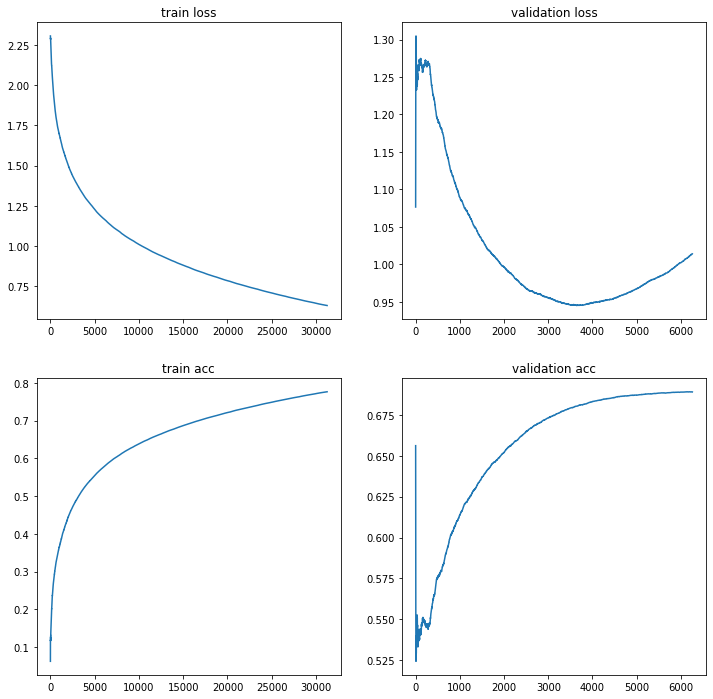

In [13]:
log.plot_metrics()

<div class="alert alert-success">
    <h2>Exercise:</h2>
        <p><b>Evaluate</b> the metrics after 15-20 epochs. Should the model train longer?</p>
</div>

<div class="alert alert-success">
    <h2>Exercise:</h2>
        <p><b>Try</b> different optimizer functions and compare the different loss curves. Additionally, <b>try</b> dropout after the linear layers, compare training dynamics.</p>
</div>

### Confusion matrix

<div class="alert alert-success">
    <h2>Exercise:</h2>
        <p><b>Write out </b> some code to obtain the confusion matrix of the predictions on the validation data.</p>
</div>

In [14]:
model.eval()
device = model.ConvBlock1[0].weight.device # were you working on cpu or cuda?

y_hat_all = []
y_true_all = []

with torch.no_grad():
    for i, data in enumerate(validation_loader):
        X_batch, y_batch = data
        X_batch = X_batch.to(device)
        y_hat = model.forward(X_batch)
        if device != 'cpu':
            y_hat_all.append(y_hat.cpu())
        else:
            y_hat_all.append(y_hat)
        y_true_all.append(y_batch)

y_hat_all = torch.cat(y_hat_all).numpy()
y_true_all = torch.cat(y_true_all).numpy()
print(y_hat_all[:5])
print(y_true_all[:5])

[[ -3.6104817   -6.9973755    1.9899082    2.115252     4.196762
    0.36012822   0.6789124   -2.126521    -5.1358852   -3.8949463 ]
 [ -8.223727    -8.952731    -1.0020776    0.10531479   4.4456797
    2.3937895   -2.7516692    6.465642    -9.828228    -6.44316   ]
 [-13.164948   -13.534095     0.96932656   2.2010806   -3.0008662
   -3.7091963   13.5196495  -11.079916   -16.417892    -5.956262  ]
 [  8.6575      -5.278719    -0.7134425   -5.707389    -2.9611914
   -7.511362    -6.2405324   -8.760309     0.54482645  -6.908779  ]
 [ -0.48014843  -5.939601     2.5163128   -0.29174054  -1.2402807
   -0.19523937  -6.6088758   -0.27026257  -6.0224633   -4.453529  ]]
[5 4 6 0 7]


In [15]:
from sklearn.metrics import confusion_matrix

def confusion_matrix_from_variables(y_hat, y_true):
    y_hat = np.argmax(y_hat, axis=1)
    matrix = confusion_matrix(y_true, y_hat)
    return matrix

In [16]:
confusion_matrix_from_variables(y_hat_all, y_true_all)

array([[657,  31,  72,  34,  37,   4,  10,  15, 107,  33],
       [ 22, 845,  11,  12,   3,   6,  14,   4,  30,  53],
       [ 61,   5, 563,  98, 111,  48,  41,  40,  20,  13],
       [ 21,  10,  64, 571,  74, 140,  44,  53,  11,  12],
       [ 23,   3,  49,  83, 704,  32,  28,  69,   7,   2],
       [ 13,   4,  67, 204,  60, 566,  15,  62,   6,   3],
       [ 12,   5,  59,  88,  61,  22, 736,  11,   4,   2],
       [ 13,   3,  43,  51,  88,  51,   9, 726,   7,   9],
       [ 43,  41,  16,  30,  11,   8,   5,   9, 814,  23],
       [ 38,  99,  15,  30,   6,   5,  10,  19,  37, 741]])

### Sample predictions

In [17]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    fig, ax = plt.subplots(1,1,figsize=(20,20))
    plt.imshow(np.transpose(npimg, (1, 2, 0)),)

plane	cat	plane	bird	horse	cat	bird	horse


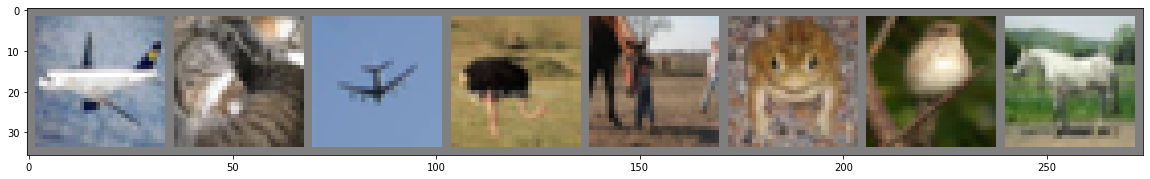

In [20]:
# creating a shuffled version of the validation loader. Now, every time you run this cell you will get different images
validation_loader = torch.utils.data.DataLoader(validationset, batch_size=32,
                                         shuffle=True, num_workers=2)

dataiter = iter(validation_loader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images[:8]),)
outputs = model.forward(images.to(device))
predicted = torch.max(outputs.data, 1)[1]
print('\t'.join(np.array(classes)[predicted.cpu().numpy()[:8]]))

<div class="alert alert-success">
    <h2>EXTRA (optional) Exercise:</h2>
        <p><b>Optimize</b> the model in any way you can. You can change to the architecture of the model, vary the hyperparameters and add any of the many optimization techniques found in literature. </p>
</div>